# Demo HyperMapper 2020: 
# a Practical Design Space Exploration Framework 

You are looking for a parameter setting that minimizes some performance metric of your algorithm (such as runtime, error, or cost). 

To use HyperMapper for this purpose you need to tell it about your parameters and how to evaluate your algorithm's performance. 

### Example 1: The Branin Black-box Function

First, we will show how to do this on a running example using a simple 1-dimensional version of the Branin function (https://www.sfu.ca/~ssurjano/branin.html). 

We look for minimizing the value of this function given the parameter $x_1 \in [-5, 10]$.

Consider the 1-dimensional Branin black-box function evaluation (which depends on the input variables x1), this is the objective we want to minimize:

In [1]:
import math
def branin_function_1d(X):
    # The function must receive a dictionary
    x1 = X['x1']
    
    # Branin function computation
    a = 1.0
    b = 5.1 / (4.0 * math.pi * math.pi)
    c = 5.0 / math.pi
    r = 6.0
    s = 10.0
    t = 1.0 / (8.0 * math.pi)
    x2 = 2.275
    value = a * (x2 - b * x1 * x1 + c * x1 - r) ** 2 + s * (1 - t) * math.cos(x1) + s

    # The function must return the objective value (a number)
    return value

We can plot the 1D Branin function and visualize the optimum (the minimum):

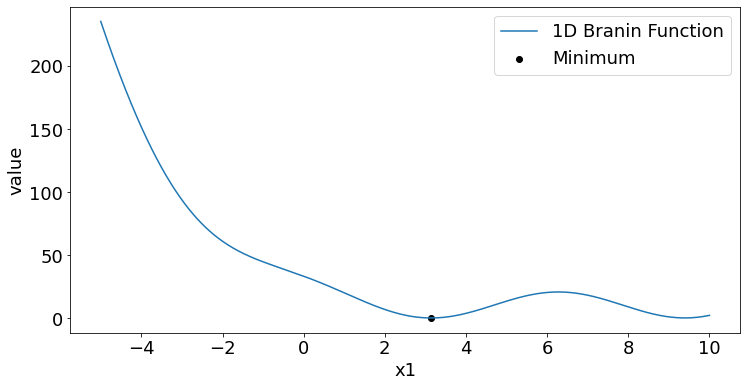

The 1d Branin function has one global optimum at x1 = π
(x, y) at minimum is: (3.141592653589793,0.39788735772973816)


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 18
point_size = matplotlib.rcParams['lines.markersize']**2.8
point_size_optimum = matplotlib.rcParams['lines.markersize']**2

optimum = math.pi
value_at_optimum=branin_function_1d({'x1': optimum})

# Sample 1000 (x,y) pairs from the function to plot its curve
branin_line_xs = np.linspace(-5, 10, 1000)
branin_line_ys = []
for x in branin_line_xs:
    y = branin_function_1d({'x1': x})
    branin_line_ys.append(y)
plt.plot(branin_line_xs, branin_line_ys, label="1D Branin Function")

# Mark the known optimum on the curve
plt.scatter(optimum, value_at_optimum, s=point_size_optimum, marker='o', color="black", label="Minimum")

plt.legend()
plt.xlabel("x1")
plt.ylabel("value")
plt.show()
print("The 1d Branin function has one global optimum at x1 = \u03C0", flush=True)
print("(x, y) at minimum is: ("+str(optimum)+","+str(value_at_optimum)+")", flush=True)

### Setup HyperMapper to Run on Branin

The inputs to HyperMapper specify an instance of the software configuration problem. In this example, we are showing how to optimize the Branin function value with a single dimension. The following is what needs to be specified as a json syntax to run Branin:

We create the json in python and then dump it on a file: 

In [3]:
import json
scenario = {}
scenario["application_name"] = "1d_branin"
scenario["optimization_objectives"] = ["value"]

number_of_RS = 3
scenario["design_of_experiment"] = {}
scenario["design_of_experiment"]["number_of_samples"] = number_of_RS
scenario["models"] = {}
scenario["models"]["model"] = "gaussian_process"

scenario["optimization_iterations"] = 10

scenario["input_parameters"] = {}
x1 = {}
x1["parameter_type"] = "real"
x1["values"] = [-5, 10]

scenario["input_parameters"]["x1"] = x1

with open("example_1d_branin_scenario.json", "w") as scenario_file:
    json.dump(scenario, scenario_file, indent=4)


To double check, print the json generated: 

In [4]:
f = open("example_1d_branin_scenario.json", "r")
text = f.read()
print(text, flush=True)
f.close()

{
    "application_name": "1d_branin",
    "optimization_objectives": [
        "value"
    ],
    "design_of_experiment": {
        "number_of_samples": 3
    },
    "models": {
        "model": "gaussian_process"
    },
    "optimization_iterations": 10,
    "input_parameters": {
        "x1": {
            "parameter_type": "real",
            "values": [
                -5,
                10
            ]
        }
    }
}


### Run HyperMapper
You are all set to run Branin and HyperMapper together!

To optimize the branin function, call HyperMapper's optimize method with the json file and the branin function as parameters:

In [5]:
import sys
import os
os.chdir("../../")
sys.path.append('scripts')
import hypermapper
stdout = sys.stdout # Jupyter uses a special stdout and HyperMapper logging overwrites it. Save stdout to restore later

# Call HyperMapper to optimize the 1d Branin function
hypermapper.optimize("example_scenarios/demo/example_1d_branin_scenario.json", branin_function_1d)
sys.stdout = stdout

Design of experiment phase, number of doe samples = 3 .......
x1,value,Timestamp
-1.9140642598313362,59.25268108216481,2
7.495183121672827,14.267936227319968,2
2.340385221708943,3.8193852817623766,2


End of doe phase, the number of new configuration runs is: 3

Starting optimization iteration 1
x1,value,Timestamp
2.3412639156961976,3.812101631975991,2222

Starting optimization iteration 2
x1,value,Timestamp
3.493298290222773,1.0523858910054447,4418

Starting optimization iteration 3
x1,value,Timestamp
3.226416428940155,0.436664393943504,6583

Starting optimization iteration 4
x1,value,Timestamp
3.1262673141135657,0.39915850778499795,8694

Starting optimization iteration 5
x1,value,Timestamp
10,2.473061481952689,10907

Starting optimization iteration 6
x1,value,Timestamp
3.1434967724384535,0.3979069684333538,13102

Starting optimization iteration 7
x1,value,Timestamp
3.140422115078067,0.39789476957417236,15362

Starting optimization iteration 8
x1,value,Timestamp
3.1422641607905533,0.3

The result of this script is a csv file called "1d_branin_output_samples.csv". You can find all the samples explored by HyperMapper during optimization in this file.

### Visualize Results
We can visualize the optimization process with a scatterplot of the points explored during optimization. The code below plots the points explored by HyperMapper during optimization. 

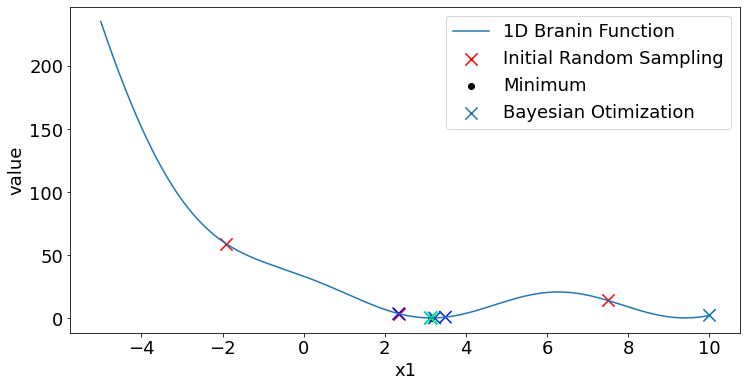

In [6]:
cmap = plt.get_cmap('winter')
plt.plot(branin_line_xs, branin_line_ys, label="1D Branin Function")

# Load the points evaluated by HyperMapper during optimization
optimum = math.pi
sampled_points = pd.read_csv("1d_branin_output_samples.csv", usecols=['x1', 'value'])
x_points = sampled_points['x1'].values
y_points = sampled_points['value'].values

# Split between DoE and BO
doe_x = x_points[:number_of_RS]
doe_y = y_points[:number_of_RS]
bo_x = x_points[number_of_RS:]
bo_y = y_points[number_of_RS:]
bo_iterations = list(range(len(bo_x)))

plt.scatter(doe_x, doe_y, s=point_size, marker='x', color="red", label="Initial Random Sampling")
plt.scatter(optimum, value_at_optimum, s=point_size_optimum, marker='o', color="black", label="Minimum")
plt.scatter(bo_x, bo_y, s=point_size, marker='x', c=bo_iterations, cmap=cmap, label="Bayesian Otimization")

plt.legend()
plt.xlabel("x1")
plt.ylabel("value")
plt.show()

Blue points show points explored during optimization, with brighter points denoting points explored in later iterations. 

### Example 2: Ordinal Input

In this example, we are showing how to optimize the Branin function with ordinal inputs. Ordinal parameters are discrete ordered numerical parameters. 

We use the same Branin function we defined in Example 1, but change the optimization configuration.


### Setup HyperMapper to Run on Branin with Ordinal Variables

We create a json for the new configuration in python and dump it on a file.

In [7]:
scenario = {}
scenario["application_name"] = "1d_branin"
scenario["optimization_objectives"] = ["value"]

number_of_RS = 2
scenario["design_of_experiment"] = {}
scenario["design_of_experiment"]["number_of_samples"] = number_of_RS
scenario["models"] = {}
scenario["models"]["model"] = "gaussian_process"

scenario["optimization_iterations"] = 8

scenario["input_parameters"] = {}
x1 = {}
x1["parameter_type"] = "ordinal"
x1["values"] = [-5.0, -4.5, -4.0, -3.5, -3.0, -1.5, -1.0, -0.5, 0.0, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 7.0, 7.5,
                8.0, 8.5, 9.0, 10.0]

scenario["input_parameters"]["x1"] = x1

with open("example_ordinal_1d_branin_scenario.json", "w") as scenario_file:
    json.dump(scenario, scenario_file, indent=4)

To double check, print the json generated: 

In [8]:
f = open("example_ordinal_1d_branin_scenario.json", "r")
text = f.read()
print(text, flush=True)
f.close()

{
    "application_name": "1d_branin",
    "optimization_objectives": [
        "value"
    ],
    "design_of_experiment": {
        "number_of_samples": 2
    },
    "models": {
        "model": "gaussian_process"
    },
    "optimization_iterations": 8,
    "input_parameters": {
        "x1": {
            "parameter_type": "ordinal",
            "values": [
                -5.0,
                -4.5,
                -4.0,
                -3.5,
                -3.0,
                -1.5,
                -1.0,
                -0.5,
                0.0,
                2.0,
                2.5,
                3.0,
                3.5,
                4.0,
                4.5,
                5.0,
                5.5,
                7.0,
                7.5,
                8.0,
                8.5,
                9.0,
                10.0
            ]
        }
    }
}


### Run HyperMapper

In [9]:
hypermapper.optimize("example_ordinal_1d_branin_scenario.json", branin_function_1d)
sys.stdout = stdout

Design of experiment phase, number of doe samples = 2 .......
x1,value,Timestamp
5.5,18.060674124988978,1
4.5,8.649933213308866,1


End of doe phase, the number of new configuration runs is: 2

Starting optimization iteration 1
x1,value,Timestamp
-4.5,190.30580997466993,128

Starting optimization iteration 2
x1,value,Timestamp
10.0,2.473061481952689,248

Starting optimization iteration 3
x1,value,Timestamp
-3.0,93.8541933295621,303

Starting optimization iteration 4
x1,value,Timestamp
2.5,2.6137237843308414,402

Starting optimization iteration 5
x1,value,Timestamp
3.0,0.506752310227002,520

Starting optimization iteration 6
x1,value,Timestamp
-1.5,51.6774984512692,653

Starting optimization iteration 7
x1,value,Timestamp
3.5,1.0771605292879318,760

Starting optimization iteration 8
x1,value,Timestamp
8.5,4.439928081572989,883

End of Random Scalarizations
### End of the hypermapper script.


### Visualize Results
We visualize the optimization process with a scatterplot of the points explored during optimization.

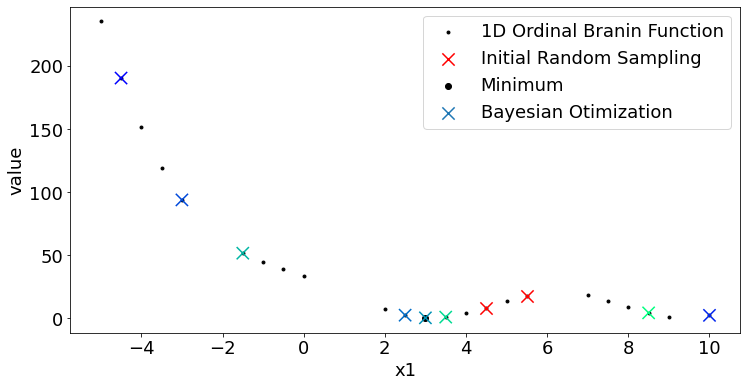

In [10]:
cmap = plt.get_cmap('winter')
point_size_ordinal = matplotlib.rcParams['lines.markersize']**1.2


branin_scatter_xs = x1["values"]
branin_scatter_ys = []
for x in branin_scatter_xs:
    y = branin_function_1d({'x1': x})
    branin_scatter_ys.append(y)
plt.scatter(branin_scatter_xs, branin_scatter_ys, s=point_size_ordinal, marker='o', color="black", label="1D Ordinal Branin Function")

# Load the points evaluated by HyperMapper during optimization
sampled_points = pd.read_csv("1d_branin_output_samples.csv", usecols=['x1', 'value'])
x_points = sampled_points['x1'].values
y_points = sampled_points['value'].values

# Split between DoE and BO
doe_x = x_points[:number_of_RS]
doe_y = y_points[:number_of_RS]
bo_x = x_points[number_of_RS:]
bo_y = y_points[number_of_RS:]
bo_iterations = list(range(len(bo_x)))
optimum = 3

plt.scatter(doe_x, doe_y, s=point_size, marker='x', color="red", label="Initial Random Sampling")
plt.scatter(optimum, value_at_optimum, s=point_size_optimum, marker='o', color="black", label="Minimum")
plt.scatter(bo_x, bo_y, s=point_size, marker='x', c=bo_iterations, cmap=cmap, label="Bayesian Otimization")

plt.legend()
plt.xlabel("x1")
plt.ylabel("value")
plt.show()

Blue points show points explored during optimization, with brighter points denoting points explored in later iterations.

The optimum in this case is at $x_1 = 3$

### Example 3: Multi-dimension Function

In this example, we are showing how to optimize the Branin function with two input parameters. We use the same branin function we defined in Example 1, but also optimize for $x_2 \in [0, 15]$.

In [11]:
def branin_function(X):
    # Here the dictionary contains both input values
    x1 = X['x1']
    x2 = X['x2']
    
    a = 1.0
    b = 5.1 / (4.0 * math.pi * math.pi)
    c = 5.0 / math.pi
    r = 6.0
    s = 10.0
    t = 1.0 / (8.0 * math.pi)

    value = a * (x2 - b * x1 * x1 + c * x1 - r) ** 2 + s * (1 - t) * math.cos(x1) + s

    return value

### Setup HyperMapper to Run on 2d Branin

We create a json for the new configuration in python and dump it on a file.

In [12]:
scenario = {}
scenario["application_name"] = "branin"
scenario["optimization_objectives"] = ["value"]

scenario["optimization_iterations"] = 20
scenario["models"] = {}
scenario["models"]["model"] = "gaussian_process"

scenario["input_parameters"] = {}
x1 = {}
x1["parameter_type"] = "real"
x1["values"] = [-5.0, 10.0]

x2 = {}
x2["parameter_type"] = "real"
x2["values"] = [0, 15.0]

scenario["input_parameters"]["x1"] = x1
scenario["input_parameters"]["x2"] = x2

with open("example_branin_scenario.json", "w") as scenario_file:
    json.dump(scenario, scenario_file, indent=4)

To double check, print the json generated: 

In [13]:
f = open("example_branin_scenario.json", "r")
text = f.read()
print(text, flush=True)
f.close()

{
    "application_name": "branin",
    "optimization_objectives": [
        "value"
    ],
    "optimization_iterations": 20,
    "models": {
        "model": "gaussian_process"
    },
    "input_parameters": {
        "x1": {
            "parameter_type": "real",
            "values": [
                -5.0,
                10.0
            ]
        },
        "x2": {
            "parameter_type": "real",
            "values": [
                0,
                15.0
            ]
        }
    }
}


### Run HyperMapper

In [14]:
hypermapper.optimize("example_branin_scenario.json", branin_function)
sys.stdout = stdout

Design of experiment phase, number of doe samples = 10 .......
x1,x2,value,Timestamp
7.503004808895632,9.36734800022722,77.88344802359667,2
9.68350084210892,14.371821658258096,136.90487886616194,2
5.609265091669666,13.942452398185226,181.47688800272365,2
6.765657845272257,13.681684337824109,175.66373076354725,2
2.030624059829731,12.917102240645493,98.2110412237381,2
9.360611520020095,8.28465351341479,34.79531785176041,2
5.131903376815233,7.75264250204668,56.39622721563108,2
0.06350944542456904,2.082357556606315,34.152892846047436,2
6.495404510654378,3.390352204005945,24.574974869732486,2
-0.28068836558169696,3.457570127102258,28.222357422362638,2


End of doe phase, the number of new configuration runs is: 10

Starting optimization iteration 1
x1,x2,value,Timestamp
10.0,4.4833348804471,4.134660500684269,2359

Starting optimization iteration 2
x1,x2,value,Timestamp
-4.990716046561144,10.63450827414053,55.22805188488444,4698

Starting optimization iteration 3
x1,x2,value,Timestamp
10.0,0

### Visualize Results
We visualize the optimization process with a scatterplot of the points explored during optimization.

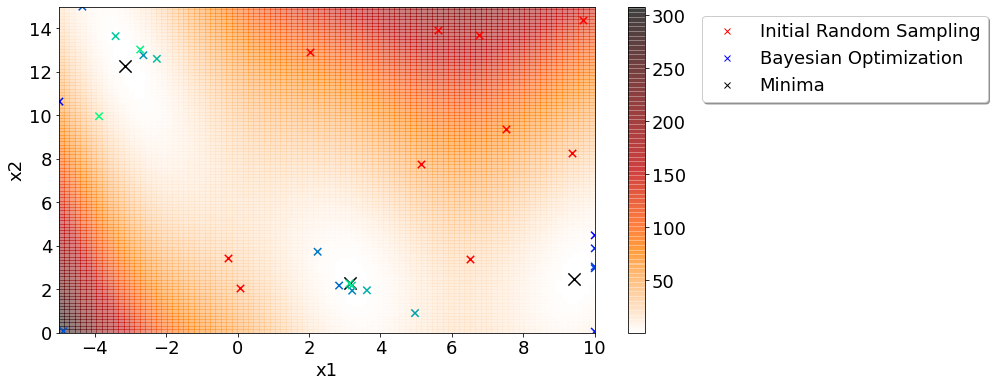

In [15]:
from matplotlib.lines import Line2D

# Plot the value of the Branin function over a grid of the space
heatmap_samples = 100
x1_heatmap_values = np.linspace(-5, 10, 100)
x2_heatmap_values = np.linspace(0, 15, 100)
branin_values = np.zeros((heatmap_samples, heatmap_samples), dtype=float)
for i, x1 in enumerate(x1_heatmap_values):
    for j, x2 in enumerate(x2_heatmap_values):
        branin_values[j,i] = branin_function({'x1': x1, 'x2': x2})

heat_cmap = plt.get_cmap("gist_heat_r")
cf = plt.pcolormesh(x1_heatmap_values, x2_heatmap_values, branin_values, cmap=heat_cmap, alpha=0.5)
plt.colorbar(cf)

# Load the points evaluated by HyperMapper during optimization
sampled_points = pd.read_csv("branin_output_samples.csv", usecols=['x1', 'x2'])
x1_points = sampled_points['x1'].values
x2_points = sampled_points['x2'].values

# Split between DoE and BO
doe_x1 = x1_points[:10]
doe_x2 = x2_points[:10]
bo_x1 = x1_points[10:]
bo_x2 = x2_points[10:]
bo_iterations = list(range(len(bo_x1)))

optima_x1 = [-3.141, 3.141, 9.425]
optima_x2 = [12.275, 2.275, 2.475]
plt.scatter(optima_x1, optima_x2, s=point_size, marker='x', color="black", label="Minima")
plt.scatter(doe_x1, doe_x2, s=point_size**0.8, marker='x', color="red", label="Initial Random Sampling")
plt.scatter(bo_x1, bo_x2, s=point_size**0.8, marker='x', c=bo_iterations, cmap=cmap, label="Bayesian Otimization")

plt.xlim(min(x1_heatmap_values), max(x1_heatmap_values))
plt.ylim(min(x2_heatmap_values), max(x2_heatmap_values))
plt.xlabel('x1')
plt.ylabel('x2')

legend_elements = [
    Line2D([0], [0], marker='x', color='red', linestyle='None', label="Initial Random Sampling"),
    Line2D([0], [0], marker='x', color='blue', linestyle='None', label="Bayesian Optimization"),
    Line2D([0], [0], marker='x', color='black', linestyle='None', label='Minima'),
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.75, 1), fancybox=True, shadow=True, ncol=1)

plt.show()

Blue points show points explored during optimization, with brighter points denoting points explored in later iterations.

The Branin function has three optima at $(-\pi, 12.275)$, $(\pi, 2.275)$, and $(9.42478, 2.475)$.

# Advanced Topics

### Example 4: Multi-dimension and Multi-objective Function

In this example, we are showing how to use HyperMapper to optimize functions with multiple objectives. HyperMapper seamlessly supports any number of objectives, we only have to define the scenario file and our optimization function accordingly.

In this example, we will use the [DTLZ1 function](https://www.cs.bham.ac.uk/~jdk/parego/ParEGO-TR3.pdf):
- 6 real parameters defined in $[0, 1]$
- 2 objectives

In [16]:
def dtlz1_function(X):
    x1 = X['x1']
    x2 = X['x2']
    x3 = X['x3']
    x4 = X['x4']
    x5 = X['x5']
    x6 = X['x6']
    
    g_sum = (x2 - 0.5)**2 + (x3 - 0.5)**2 + (x4 - 0.5)**2 + (x5 - 0.5)**2 + (x6 - 0.5)**2
    g_cos = math.cos(2*math.pi*(x2 - 0.5)) + math.cos(2*math.pi*(x3 - 0.5)) + math.cos(2*math.pi*(x4 - 0.5))\
          + math.cos(2*math.pi*(x5 - 0.5)) + math.cos(2*math.pi*(x6 - 0.5))
    g = 100*(5 + g_sum - g_cos)
    f1_value = 0.5*x1*(1 + g)
    f2_value = 0.5*(1 - x1)*(1 + g)

    # Since we have multiple objectives, we return a dictionary
    output_metrics = {}
    output_metrics['f1_value'] = f1_value
    output_metrics['f2_value'] = f2_value

    return output_metrics

This is not a function we can easily visualize because of the multiple input/output dimensions. 

### Setup HyperMapper to Run on DTLZ1

We create the json in python and then dump it on a file: 

In [17]:
scenario = {}
scenario["application_name"] = "dtlz1"
scenario["optimization_objectives"] = ["f1_value", "f2_value"]

scenario["models"] = {}
scenario["models"]["model"] = "gaussian_process"
scenario["optimization_iterations"] = 10


scenario["input_parameters"] = {}
x1 = {}
x1["parameter_type"] = "real"
x1["values"] = [0, 1]
scenario["input_parameters"]["x1"] = x1
x2 = {}
x2["parameter_type"] = "real"
x2["values"] = [0, 1]
scenario["input_parameters"]["x2"] = x2
x3 = {}
x3["parameter_type"] = "real"
x3["values"] = [0, 1]
scenario["input_parameters"]["x3"] = x3
x4 = {}
x4["parameter_type"] = "real"
x4["values"] = [0, 1]
scenario["input_parameters"]["x4"] = x4
x5 = {}
x5["parameter_type"] = "real"
x5["values"] = [0, 1]
scenario["input_parameters"]["x5"] = x5
x6 = {}
x6["parameter_type"] = "real"
x6["values"] = [0, 1]
scenario["input_parameters"]["x6"] = x6

with open("example_dtlz1_scenario.json", "w") as scenario_file:
    json.dump(scenario, scenario_file, indent=4)


To double check, print the json generated:

In [18]:
f = open("example_dtlz1_scenario.json", "r")
text = f.read()
print(text, flush=True)
f.close()

{
    "application_name": "dtlz1",
    "optimization_objectives": [
        "f1_value",
        "f2_value"
    ],
    "models": {
        "model": "gaussian_process"
    },
    "optimization_iterations": 10,
    "input_parameters": {
        "x1": {
            "parameter_type": "real",
            "values": [
                0,
                1
            ]
        },
        "x2": {
            "parameter_type": "real",
            "values": [
                0,
                1
            ]
        },
        "x3": {
            "parameter_type": "real",
            "values": [
                0,
                1
            ]
        },
        "x4": {
            "parameter_type": "real",
            "values": [
                0,
                1
            ]
        },
        "x5": {
            "parameter_type": "real",
            "values": [
                0,
                1
            ]
        },
        "x6": {
            "parameter_type": "real",
            

### Run HyperMapper

In [19]:
hypermapper.optimize("example_scenarios/demo/example_dtlz1_scenario.json", dtlz1_function)
sys.stdout = stdout

Design of experiment phase, number of doe samples = 10 .......
x1,x2,x3,x4,x5,x6,f1_value,f2_value,Timestamp
0.06362200617388535,0.2359173001978881,0.2056465473805482,0.08604824838239546,0.4295994124938275,0.7561494118103385,18.335898460981625,269.864671808176,2
0.07718881175437599,0.9298796907015403,0.02578005937455443,0.004955305988537923,0.7824726772130823,0.3924937408463391,31.14276070210113,372.31934726765377,2
0.9020442818951261,0.021547172338579137,0.8055460520713128,0.6040202883494997,0.754733946671717,0.8992272415640922,313.1068547007436,34.001220795206585,2
0.9571100886634882,0.452981172206106,0.9517197334545141,0.8485156532629099,0.196494339834821,0.6938785448475158,288.5608409470287,12.930956459449414,2
0.6268165973771678,0.8234184973500985,0.24181980646228612,0.9512796517386912,0.08587374386736522,0.4750584920521854,215.5378135706428,128.32323681081272,2
0.8482331947503943,0.04948548583769759,0.4086188096842508,0.6427266969598467,0.5073022470897415,0.688122426129067,143.66

### Visualize Results

This script computes the Pareto front from the output of HyperMapper: 

In [20]:
!!python3 scripts/compute_pareto.py "example_scenarios/demo/example_dtlz1_scenario.json"

['######## compute_pareto.py #####################',
 '### Parameters file is example_scenarios/demo/example_dtlz1_scenario.json',
 '### The input data file is ./dtlz1_output_samples.csv',
 '### The output Pareto file is ./dtlz1_output_pareto.csv',
 '################################################',
 'Computing the Pareto...',
 'Time to read from file ./dtlz1_output_samples.csv and create the data array is: 0.000239 sec',
 'Total time of computation is (read and Pareto computation): 0.008239 seconds',
 'The total size of the Pareto (RS + AL) is: 6',
 'End of the compute_pareto.py script!',
 '']

This scripts plot the Pareto front:

In [21]:
!!python3 scripts/plot_dse.py "example_scenarios/demo/example_dtlz1_scenario.json"

['######### plot_dse.py ##########################',
 '### Parameters file is example_scenarios/demo/example_dtlz1_scenario.json',
 '### The Pareto and DSE data files are: ./dtlz1_output_pareto.csv ./dtlz1_output_samples.csv ',
 '### The first output pdf image is ./dtlz1_output_pareto.pdf',
 '### The second output pdf image is ./all_dtlz1_output_pareto.pdf',
 '################################################',
 'Loading data from ./dtlz1_output_pareto.csv ...',
 'Time to read from file ./dtlz1_output_pareto.csv and create the data array is: 0.000124 sec',
 "Parameters are ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'f1_value', 'f2_value', 'Timestamp']",
 '',
 'Size of the data file ./dtlz1_output_pareto.csv is 6',
 'Loading data from ./dtlz1_output_samples.csv ...',
 'Time to read from file ./dtlz1_output_samples.csv and create the data array is: 0.000241 sec',
 "Parameters are ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'f1_value', 'f2_value', 'Timestamp']",
 '',
 'Size of the data file ./dtlz1_out

In [22]:
from IPython.display import IFrame
IFrame("./dtlz1_output_pareto.pdf", width=1000, height=600)

### Example 5: Constrained Function

In this example, we are showing how to optimize the constrained Chakong-Haimes function:
- 2 real parameters defined in $[-20, 20]$
- 2 output dimensions

The Chakong-Haimes function has two feasibility constraints:

$x_1^2 + x_2^2 \leq 225$

$x_1 - 3x_2 + 10 \leq 0$

In [23]:
def chakong_haimes(X):
    x1 = X['x1']
    x2 = X['x2']
    f1_value = 2 + (x1 - 2)*(x1 - 2) + (x2 - 1)*(x2 - 1)
    f2_value = 9*x1 - (x2 - 1)*(x2 - 1)

    # check constraints
    c1 = x1*x1 + x2*x2 <= 225
    c2 = x1 - 3*x2 + 10 <= 0
    valid = c1 and c2

    output = {}
    output['f1_value'] = f1_value
    output['f2_value'] = f2_value
    output['Valid'] = valid

    return output

### Setup HyperMapper to Run on Chakong-Haimes

We create the json in python and then dump it on a file: 

In [24]:
scenario = {}
scenario["application_name"] = "chakong_haimes"
scenario["optimization_objectives"] = ["f1_value", "f2_value"]

number_of_RS = 20
scenario["design_of_experiment"] = {}
scenario["design_of_experiment"]["number_of_samples"] = number_of_RS

scenario["models"] = {}
scenario["models"]["model"] = "gaussian_process"
scenario["optimization_iterations"] = 20

scenario["feasible_output"] = {}
scenario["feasible_output"]["enable_feasible_predictor"] = True


scenario["input_parameters"] = {}
x1 = {}
x1["parameter_type"] = "real"
x1["values"] = [-20, 20]
scenario["input_parameters"]["x1"] = x1
x2 = {}
x2["parameter_type"] = "real"
x2["values"] = [-20, 20]
scenario["input_parameters"]["x2"] = x2

with open("example_scenarios/demo/example_chakong_haimes_scenario.json", "w") as scenario_file:
    json.dump(scenario, scenario_file, indent=4)

To double check, print the json generated:

In [25]:
f = open("example_scenarios/demo/example_chakong_haimes_scenario.json", "r")
text = f.read()
print(text, flush=True)
f.close()

{
    "application_name": "chakong_haimes",
    "optimization_objectives": [
        "f1_value",
        "f2_value"
    ],
    "design_of_experiment": {
        "number_of_samples": 20
    },
    "models": {
        "model": "gaussian_process"
    },
    "optimization_iterations": 20,
    "feasible_output": {
        "enable_feasible_predictor": true
    },
    "input_parameters": {
        "x1": {
            "parameter_type": "real",
            "values": [
                -20,
                20
            ]
        },
        "x2": {
            "parameter_type": "real",
            "values": [
                -20,
                20
            ]
        }
    }
}


### Run HyperMapper

In [26]:
hypermapper.optimize("example_scenarios/demo/example_chakong_haimes_scenario.json", chakong_haimes)
sys.stdout = stdout

Design of experiment phase, number of doe samples = 20 .......
x1,x2,f1_value,f2_value,Valid,Timestamp
-18.813325103810456,-10.612806582000104,570.0517785878515,-304.17720264523905,False,2
8.351356790522736,-13.084513242903007,240.71324637002945,-123.21130217480555,False,2
-5.2050239214605085,-14.835972340444314,304.69038967613557,-297.62323526046197,False,2
10.387775475498135,-1.911020822812823,80.82881965821781,85.01593704863336,False,2
-0.6240689244853783,13.813389914555366,173.06869882287899,-169.79958142279756,True,2
-1.009554905006258,-2.5146812416012096,23.410404956310646,-21.438978375119742,False,2
-10.788625046666295,-16.315744116759603,465.3839249013153,-396.9326197370915,False,2
-6.200780857982622,2.348009462366477,71.06993619128374,-57.62415723247315,True,2
-19.28437373840957,-8.377199769012973,542.956440944276,-261.49123915366306,False,2
-8.70252131483136,-12.24199125040944,291.89429477033974,-253.67302410940238,False,2
10.391247943682316,-17.802762946151223,425.9569364615

### Visualize Results
We can visualize the optimization process using a Pareto front. 

The Pareto script computes the Pareto front considering only feasible points: 

In [27]:
!!python3 scripts/compute_pareto.py "example_scenarios/demo/example_chakong_haimes_scenario.json"
!!python3 scripts/plot_dse.py "example_scenarios/demo/example_chakong_haimes_scenario.json"
IFrame("./chakong_haimes_output_pareto.pdf", width=1000, height=600)